In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.axes import Axes 
import math
import time
from tensorflow import keras, set_random_seed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, SimpleRNN
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
%matplotlib inline
np.random.seed(42)
set_random_seed(42)

## Reading the previous analysis results and making plots ## 

In [16]:
## Metric frames ## 
HyperParam=[5]#10,20,30,60,120,180,240,300] ## Sampling Window 
FilesMetric=['MetaData/MetricFrame_1layer_RNN_'+str(param)+'.csv' for param in HyperParam]
FilesData=['MetaData/Uncertainty-Forecast_1layer_RNN_'+str(param)+'.csv' for param in HyperParam]
MetricFrames=[pd.read_csv(File) for File in FilesMetric]
DataFrames=[pd.read_csv(File) for File in FilesData]




<Figure size 432x288 with 0 Axes>

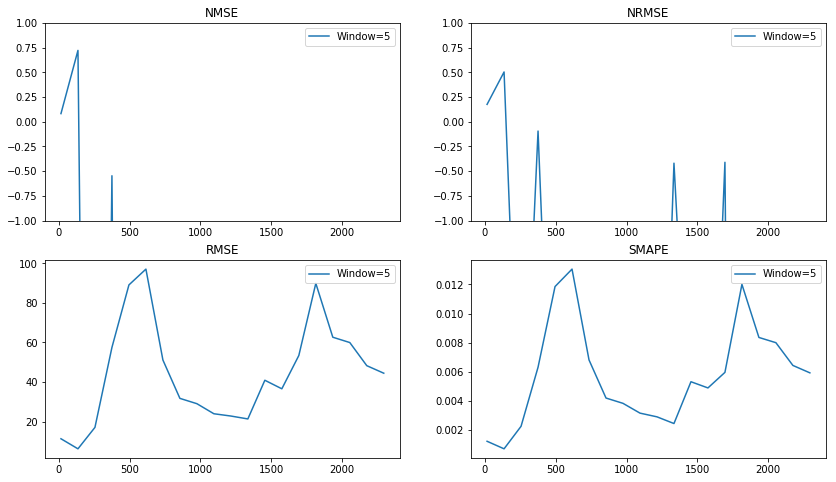

In [13]:
## Plotting the metrics performance ## 



plt.clf()
L=len(HyperParam)
L2=L
L1=0
fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(14,8),frameon=True)
#plt.xlabel("Section")
#plt.ylabel("$Pressure$ ")
#plt.ylim(7000,8000)
#plt.xlim(0,8000)
#plt.title("With and Without P, CNN-RNN, Stage 15")
axs[0,0].set_title("NMSE")
#axs[0,0].set_ylim(-1,1)
for i in range(L1,L2):
    metric=MetricFrames[i]
    title='Window='+str(HyperParam[i])
    axs[0,0].plot(metric.Section,metric.NMSE, label=title)
    axs[0,0].legend()

    
axs[0,1].set_title("NRMSE")    
for i in range(L1,L2):
    metric=MetricFrames[i]
    title='Window='+str(HyperParam[i])
    axs[0,1].plot(metric.Section,metric.NRMSE, label=title)
    axs[0,1].legend()
    
    
axs[0,0].set_ylim([-1,1])


axs[0,1].set_ylim(-1,1)

axs[1,1].set_title("SMAPE")
for i in range(L1,L2):
    metric=MetricFrames[i]
    title='Window='+str(HyperParam[i])
    axs[1,1].plot(metric.Section,metric.SMAPE, label=title)
    axs[1,1].legend()


axs[1,0].set_title("RMSE")
for i in range(L1,L2):
    metric=MetricFrames[i]
    title='Window='+str(HyperParam[i])
    axs[1,0].plot(metric.Section,metric.RMSE, label=title)
    axs[1,0].legend()


#axs[0,0].set_ylim([-1,1])


#plt.savefig("Images/Metrics_OverFitting_20-30-60.png")
#plt.savefig("Images/Reg_NoReg_timeseries_Metric_Test.png")
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 1008x576 with 0 Axes>

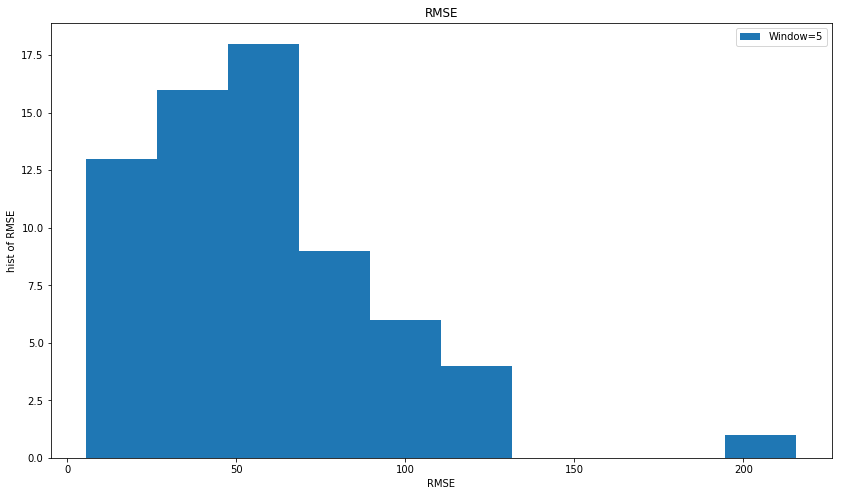

<Figure size 432x288 with 0 Axes>

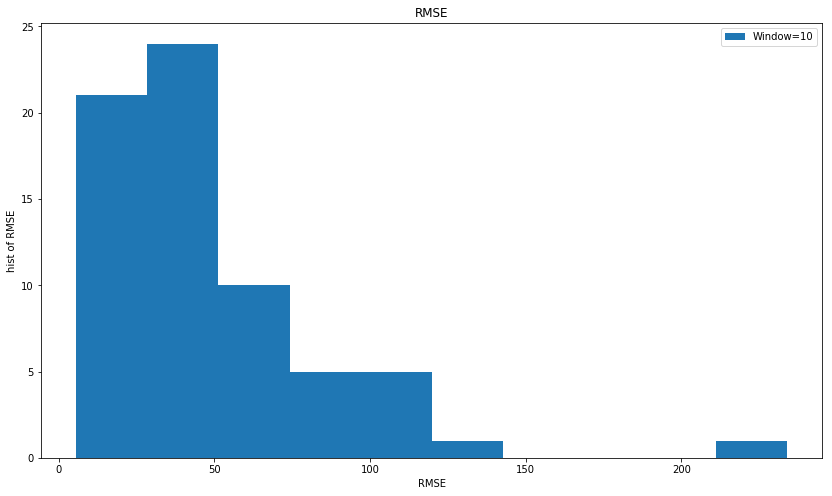

<Figure size 432x288 with 0 Axes>

<Figure size 1008x576 with 0 Axes>

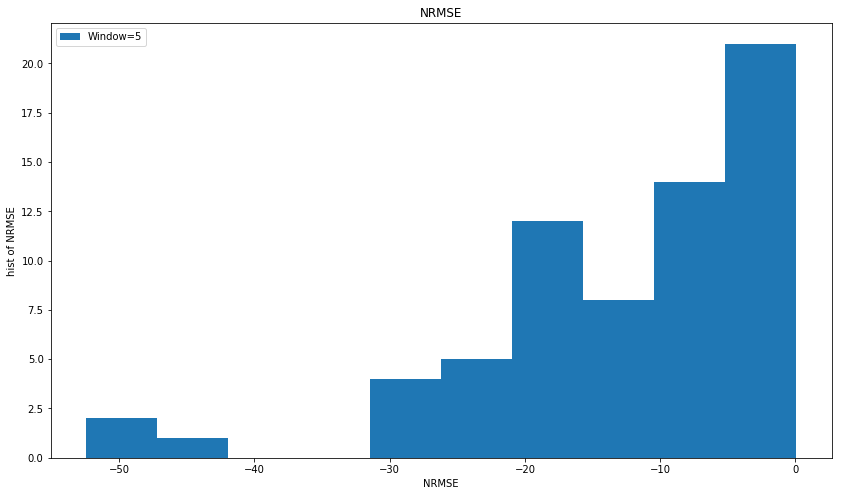

<Figure size 432x288 with 0 Axes>

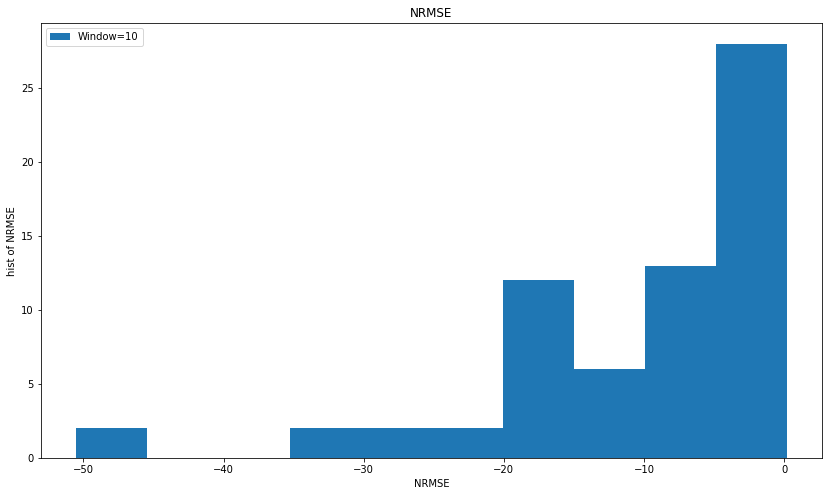

In [4]:
plt.clf()
fig, ax = plt.subplots(figsize=(14,8),frameon=True)
#plt.xlabe
for i in range(L):
    plt.clf()
    param=HyperParam[i]
    fig, ax = plt.subplots(figsize=(14,8),frameon=True)    
    title='Window='+str(HyperParam[i])
    ax.set_ylabel('hist of RMSE')
    ax.set_title('RMSE')
    ax.set_xlabel('RMSE')
    ax.hist(MetricFrames[i].RMSE,label=title)
    ax.legend()
    plt.savefig("Images/RMSE_hist_"+str(param)+".png")    
    plt.show()
    

plt.clf()
fig, ax = plt.subplots(figsize=(14,8),frameon=True)
#plt.xlabe
for i in range(L):
    plt.clf()
    fig, ax = plt.subplots(figsize=(14,8),frameon=True)    
    title='Window='+str(HyperParam[i])
    ax.set_ylabel('hist of NRMSE')
    ax.set_title('NRMSE')
    ax.set_xlabel('NRMSE')
    ax.hist(MetricFrames[i].NRMSE,label=title)
    ax.legend()
#    plt.savefig("Images/NRMSE_hist_"+str(param)+".png")
    plt.show()

#pd.DataFrame.hist(MetricFrames[0])#.NRMSE)
#MetricFrames[0].hist
#print(df)

NRMSE
5 -12.429564512538697 11.632746858166866
10 -10.25928392378854 10.774630455256604


IndexError: list index out of range

<Figure size 432x288 with 0 Axes>

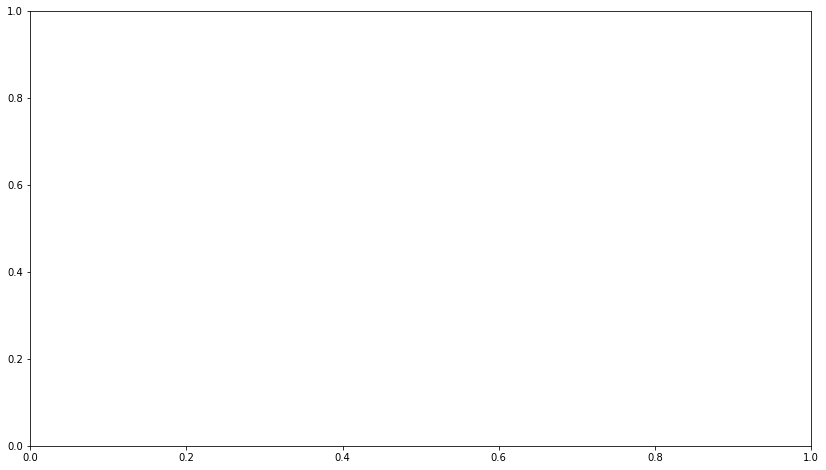

In [23]:
plt.clf()
fig, ax = plt.subplots(figsize=(14,8),frameon=True)

NRMSE=[]
nrmseErr=[]
Windows=[]
(x,)=MetricFrames[i].Section.shape
print('NRMSE')
for i in range(8):
    Window=HyperParam[i]    
    S=pd.DataFrame.mean(MetricFrames[i])#,range=())
    S1=pd.DataFrame.std(MetricFrames[i])
    (x,)=MetricFrames[i].Section.shape    
    NRMSE.append(S.NRMSE)
    nrmseErr.append(S1.NRMSE)#/math.sqrt(x))
    print(Window,S.NRMSE,S1.NRMSE)#,S1.NRMSE/math.sqrt(x))
    Windows.append(Window)

ax.set_xlabel('Window Size')    
ax.set_ylabel('NRMSE')    
ax.set_title('Learning Curve/Over Fitting')
ax.errorbar(Windows,NRMSE,yerr=nrmseErr,fmt='-o')
#plt.pl
#plt.savefig("Images/NRMSE_Window_LC.png")
plt.show()    
    
print('RMSE')
RMSE=[]
rmseErr=[]
for i in range(8):
    Window=HyperParam[i]
    S=pd.DataFrame.mean(MetricFrames[i])#nge=(0,150))#,range=())
    S1=pd.DataFrame.std(MetricFrames[i])#,range=(0,150))
    RMSE.append(S.RMSE)
    rmseErr.append(S1.RMSE)
    print(Window,S.RMSE,S1.RMSE)
plt.clf()
fig, ax = plt.subplots(figsize=(14,8),frameon=True)
ax.set_title('Learning Curve/Over Fitting')
ax.set_xlabel('Window Size')    
ax.set_ylabel('RMSE')    
ax.errorbar(Windows,RMSE,yerr=rmseErr,fmt='-o')#,color='r')
#plt.savefig("Images/RMSE_Window_LC.png")
#plt.pl
plt.show()

In [65]:
MetricFrames[0].Section.shape

(67,)

<Figure size 432x288 with 0 Axes>

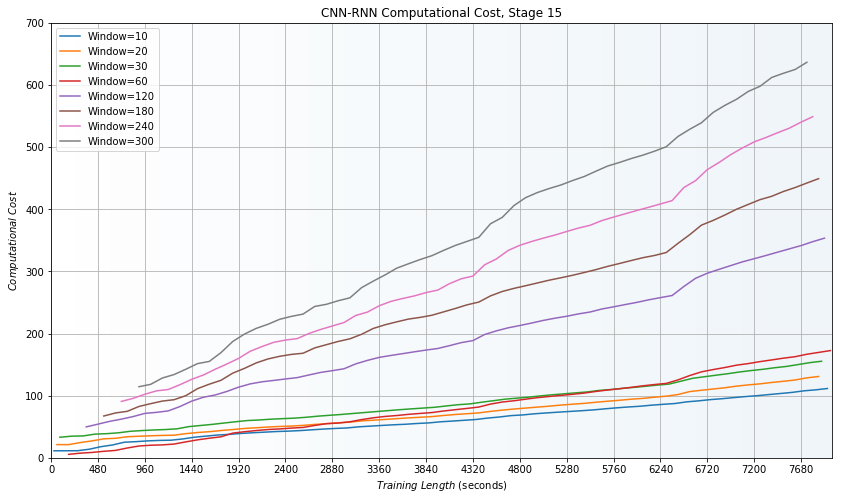

In [12]:
plt.clf()
fig, ax = plt.subplots(figsize=(14,8),frameon=True)
plt.xlabel("$Training$ $Length$ (seconds)")
plt.ylabel("$Computational$ $Cost$ ")
plt.ylim(0,700)#7000,8000)
plt.xlim(0,8000)
plt.title("CNN-RNN Computational Cost, Stage 15")
for i in range(len(HyperParam)):
    param=HyperParam[i]
    S2=MetricFrames[i]
    ax.plot(S2.Section,S2.CalcTime,label="Window="+str(param))#,color='r')
#    ax.plot(S1.Section,S1.CalcTime,label="Forecast Pressure Without Reg",color='b')

ax.legend()
x=[i for i in range(0,8000,480)]
for i in range(0,8000,120):
    plt.axvspan(i,i+120,alpha=0.1*math.sin(0.0001*i))

#for i in range(0,8000,480):
plt.xticks(x)
plt.grid(True)

plt.savefig("Images/CompCost_OverFitting_Test.png")
#plt.savefig("Images/Reg_NoReg_timeseries_CompCost_Test.png")
plt.show()



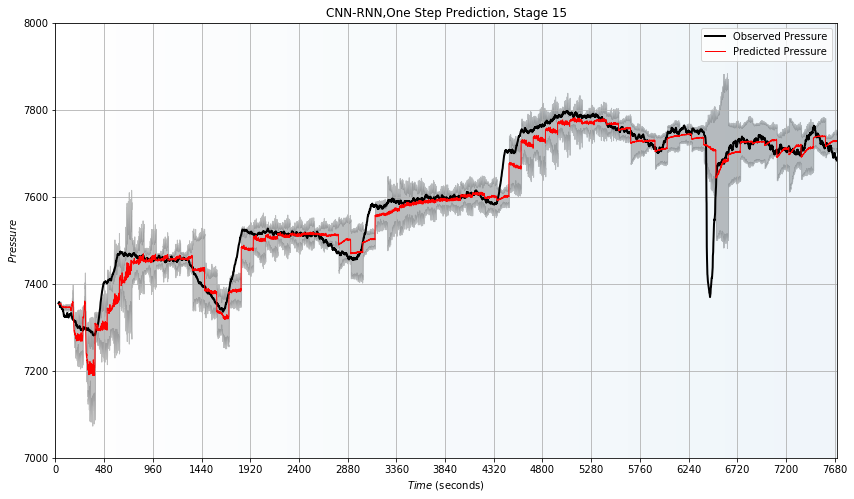

<Figure size 432x288 with 0 Axes>

In [36]:
fig, ax2 = plt.subplots(figsize=(14,8),frameon=True)
ax2.set_facecolor((1, 1, 1))
ax2.spines['bottom'].set_color('k')
ax2.spines['top'].set_color('k') 
ax2.spines['right'].set_color('k')
ax2.spines['left'].set_color('k')
#plt.show()
#uncertain2=new_uncertain
#ax.spines(color='black')
#, label="Monthly average of Daily prediction")
ax2.plot(D1.Time, D1.Observation,'black',linewidth=2,label='Observed Pressure')
ax2.plot(D1.Time, D1.Forecast,'r',linewidth=1,label='Predicted Pressure')
ax2.legend()
#c=mt_Frame[["Time"]]
plt.fill_between(D1.Time,D1.Forecast-2*D1.ConfidenceLevel,D1.Forecast+2*D1.ConfidenceLevel, alpha=0.5, color = '0.5')
plt.xlabel("$Time$ (seconds)")
plt.ylabel("$Pressure$")
plt.ylim(7000,8000)
plt.xlim(0,7700)
plt.title("CNN-RNN,One Step Prediction, Stage 15")

x=[i for i in range(0,8000,480)]
for i in range(0,8000,120):
    plt.axvspan(i,i+120,alpha=0.1*math.sin(0.0001*i))
plt.xticks(x)

#for i in range(0,8000,480):
plt.xticks(x)
plt.grid(True)
#plt.savefig("Images/Uncertainty_ND_NG_WithAnamoly_V2_timeseries_P0_P_Test.png")
#plt.savefig("Images/Monthly_timeseries_Q0_Q_Test.png")

#
#plt.xlabel("Q")
#plt.ylabel(r"$Q_{pred}$")
#plt.title(r"")
#plt.tight_layout()
plt.show()
plt.clf()


<Figure size 432x288 with 0 Axes>

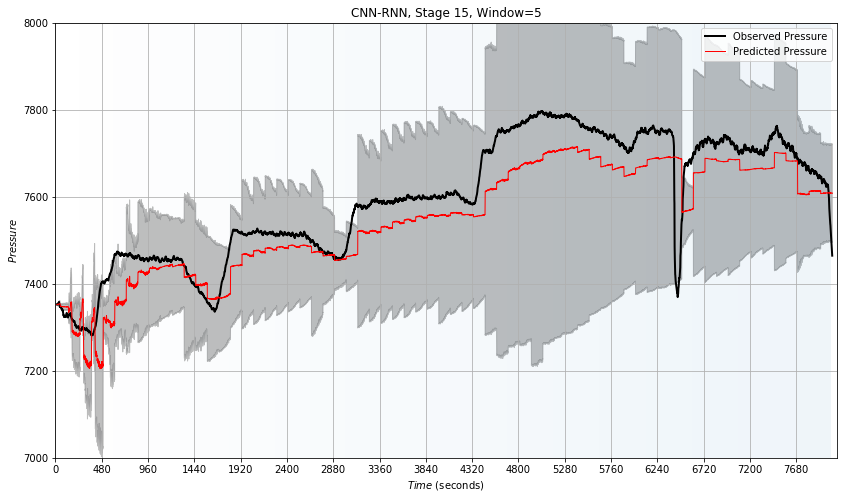

<Figure size 432x288 with 0 Axes>

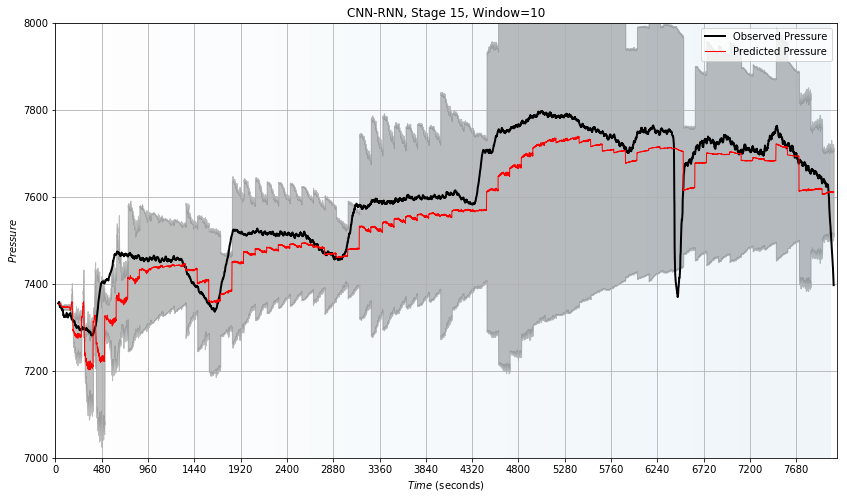

<Figure size 432x288 with 0 Axes>

In [24]:
plt.clf()
for i in range(len(HyperParam)):
    D1=DataFrames[i]
    param=str(HyperParam[i])
    title='Window='+str(HyperParam[i])
    fig, ax = plt.subplots(figsize=(14,8),frameon=True)
    #fig, ax = plt.subplots(figsize=(14,8),frameon=True)
    ax.set_facecolor((1, 1, 1))    
    ax.set_facecolor((1, 1, 1))
    ax.spines['bottom'].set_color('k')
    ax.spines['top'].set_color('k') 
    ax.spines['right'].set_color('k')
    ax.spines['left'].set_color('k')
    ax.plot(D1.Time, D1.Observation,'black',linewidth=2,label='Observed Pressure')
    ax.plot(D1.Time, D1.Forecast,'r',linewidth=1,label='Predicted Pressure')
    
    ax.legend()

    plt.fill_between(D1.Time,D1.Forecast-2*D1.ConfidenceLevel,D1.Forecast+2*D1.ConfidenceLevel, alpha=0.5, color = '0.5')
    plt.xlabel("$Time$ (seconds)")
    plt.ylabel("$Pressure$")
    plt.ylim(7000,8000)
    plt.xlim(0,8100)
    plt.title("CNN-RNN, Stage 15, "+title)

    x=[i for i in range(0,8000,480)]
    for i in range(0,8000,120):
        plt.axvspan(i,i+120,alpha=0.1*math.sin(0.0001*i))
    plt.xticks(x)

#for i in range(0,8000,480):
    plt.xticks(x)
    plt.grid(True)
    plt.savefig("Images/Forecast_OverFitting_1layer_Window"+param+".png")

    plt.show()
    plt.clf()


<Figure size 432x288 with 0 Axes>

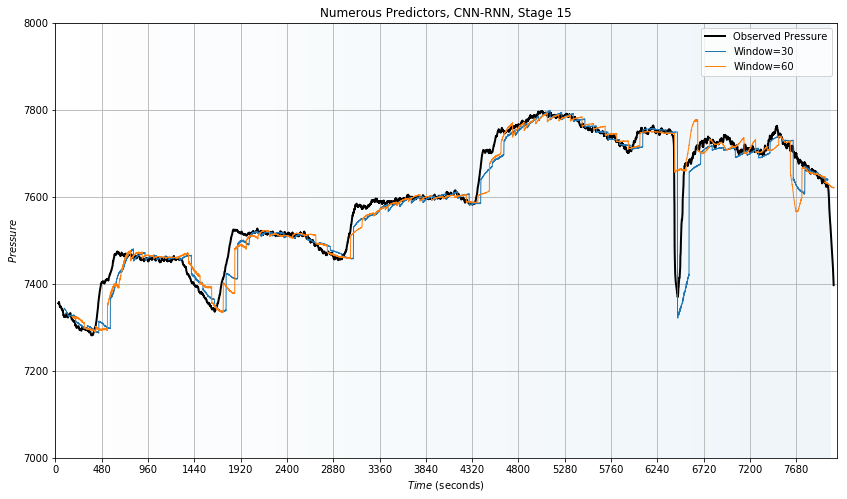

In [30]:
plt.clf()
fig, ax = plt.subplots(figsize=(14,8),frameon=True)
plt.xlabel("$Time$ (seconds)")
plt.ylabel("$Pressure$ ")
plt.ylim(7000,8000)
plt.xlim(0,8100)
plt.title("Numerous Predictors, CNN-RNN, Stage 15")
D1=DataFrames[0]
ax.plot(D1.Time, D1.Observation,'black',linewidth=2,label='Observed Pressure')

for i in range(2,4):#len(HyperParam)):
    param=str(HyperParam[i])
    D1=DataFrames[i]
#    fTitle="/home/may706/LinuxBox/MetaData/Forecast_"+param
    #plt.plot(Da)#"/home/may706/LinuxBox/MetaData/Forecast_"+str(i))
    ax.plot(D1.Time, D1.Forecast,linewidth=1,label='Window='+param)
ax.legend()

x=[i for i in range(0,8000,480)]
for i in range(0,8000,120):
    plt.axvspan(i,i+120,alpha=0.1*math.sin(0.0001*i))

#for i in range(0,8000,480):
plt.xticks(x)
plt.grid(True)

#plt.savefig("Images/Numerous_ND_NG_WithAnamoly_V2_timeseries_P0_P_Test.png")
#plt.savefig("Images/Various_P02_timeseries_P0_P_Test.png")
plt.show()



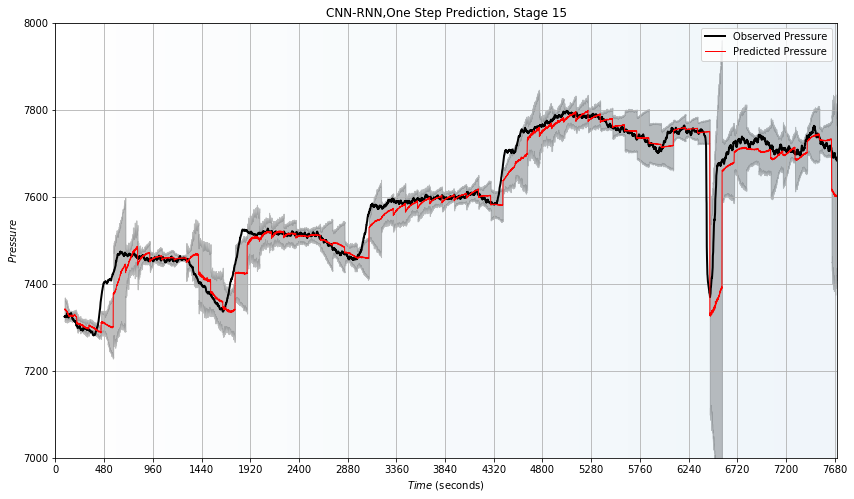

<Figure size 432x288 with 0 Axes>

In [61]:
fig, ax2 = plt.subplots(figsize=(14,8),frameon=True)
ax2.set_facecolor((1, 1, 1))
ax2.spines['bottom'].set_color('k')
ax2.spines['top'].set_color('k') 
ax2.spines['right'].set_color('k')
ax2.spines['left'].set_color('k')
#plt.show()
#uncertain2=new_uncertain
#ax.spines(color='black')
#, label="Monthly average of Daily prediction")
ax2.plot(D3.Time, D3.Observation,'black',linewidth=2,label='Observed Pressure')
ax2.plot(D3.Time, D3.Forecast,'r',linewidth=1,label='Predicted Pressure')
ax2.legend()
#c=mt_Frame[["Time"]]
plt.fill_between(D3.Time,D3.Forecast-2*D3.ConfidenceLevel,D3.Forecast+2*D3.ConfidenceLevel, alpha=0.5, color = '0.5')
plt.xlabel("$Time$ (seconds)")
plt.ylabel("$Pressure$")
plt.ylim(7000,8000)
plt.xlim(0,7700)
plt.title("CNN-RNN,One Step Prediction, Stage 15")

x=[i for i in range(0,8000,480)]
for i in range(0,8000,120):
    plt.axvspan(i,i+120,alpha=0.1*math.sin(0.0001*i))
plt.xticks(x)

#for i in range(0,8000,480):
plt.xticks(x)
plt.grid(True)
#plt.savefig("Images/Uncertainty_ND_NG_WithAnamoly_V2_timeseries_P0_P_Test.png")
#plt.savefig("Images/Monthly_timeseries_Q0_Q_Test.png")

#
#plt.xlabel("Q")
#plt.ylabel(r"$Q_{pred}$")
#plt.title(r"")
#plt.tight_layout()
plt.show()
plt.clf()


<Figure size 432x288 with 0 Axes>

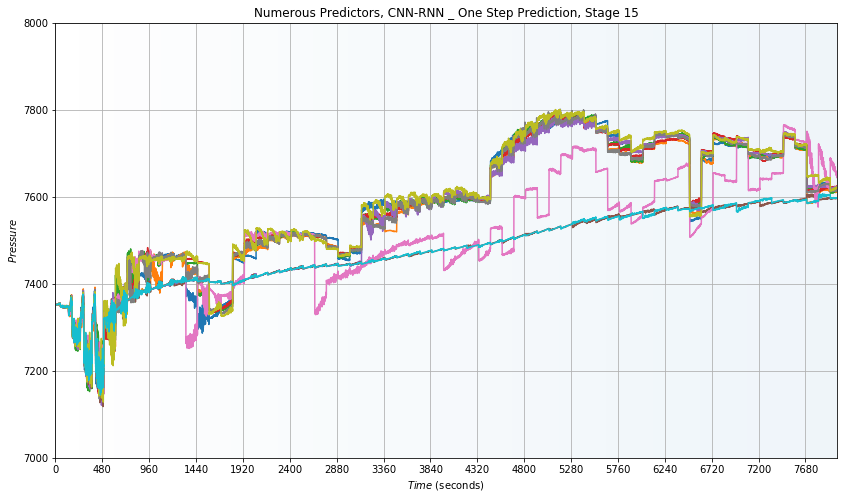

In [21]:
#S1=DataFrame_10
#S2=DataFrame_30
plt.clf()
fig, ax = plt.subplots(figsize=(14,8),frameon=True)
plt.xlabel("$Time$ (seconds)")
plt.ylabel("$Pressure$ ")
plt.ylim(7000,8000)
plt.xlim(0,8000)
plt.title("Numerous Predictors, CNN-RNN _ One Step Prediction, Stage 15")
D1=DataFrames[0]
for i in range(10):
#    fTitle="/home/may706/LinuxBox/MetaData/Forecast_"+str(i+1)
    fTitle="Forecast_"+str(i+1)
    plt.plot(D1.Time,D1[fTitle])#"/home/may706/LinuxBox/MetaData/Forecast_"+str(i))

x=[i for i in range(0,8000,480)]
for i in range(0,8000,120):
    plt.axvspan(i,i+120,alpha=0.1*math.sin(0.0001*i))

#for i in range(0,8000,480):
plt.xticks(x)
plt.grid(True)

#plt.savefig("Images/Numerous_ND_NG_WithAnamoly_V2_timeseries_P0_P_Test.png")
#plt.savefig("Images/Various_P02_timeseries_P0_P_Test.png")
plt.show()

